# Praca domowa 2 
### Mateusz Krzyziński, grupa 2


Zadanie to składa się z dwóch odrębnych części poświęconych zagadnieniom związanym z uczeniem maszynowym, w szczególności preprocessingiem:
1. Kodowanie zmiennych kategorycznych
2. Uzupełnianie braków w danych

Wykorzystany zostanie zbiór danych [Allegro](https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1).

#### Import pakietów

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Wczytanie danych

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")

In [3]:
df.head(10)

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"
5,5,2016-04-03 16:31:01,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
6,6,2016-04-03 17:56:11,4790991674,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,Noemi-bielizna,10.99,1,742,0,39371,GĄBIN,"Odzież, Obuwie, Dodatki"
7,7,2016-04-03 11:58:55,4824025074,"['Biżuteria i Zegarki', 'Zegarki', 'Dziecięce']",1,1,handel_barbo,28.99,1,886,0,4287,Legionowo,Biżuteria i Zegarki
8,8,2016-04-03 18:18:37,4826332874,"['RTV i AGD', 'AGD drobne', 'Higiena i pielęgn...",1,1,jupiter2009,12.00,0,49,0,5403,zachodniopomorskie,RTV i AGD
9,9,2016-04-03 22:56:56,4828603874,"['RTV i AGD', 'Kamery', 'Zasilanie', 'Zasilacze']",1,1,e-trade-com-pl,45.00,1,4,0,15561,Warszawa,RTV i AGD


### 1. Kodowanie zmiennych kategorycznych

#### Target encoding 
Naszym pierwszym zadaniem w tej części będzie wykonać target encoding dla zmiennej `it_location`, gdzie targetem jest `price`. Przyjrzyjmy się najpierw kolumnie, którą będziemy kodować. 

In [4]:
df["it_location"].describe()

count       420020
unique       10056
top       Warszawa
freq         23244
Name: it_location, dtype: object

Mamy aż 10 000 unikalnych wartości zmiennej lokalizacji, ale powyżej możemy zobaczyć, że nazwy miejscowośći są zapisane w różny sposób (od wielkiej litery, tylko wielkimi literami etc.) - lokalizacja była zapewne wpisywana przez sprzedawców, a nie wybierana z listy. 

W związku z tym jeszcze przed przystąpieniem do zadania, w celu ujednolicenia sposobu zapisu możemy zamienić je na małe litery.

In [5]:
df["it_location"] = df["it_location"].str.lower()

In [6]:
df["it_location"].describe()

count       420020
unique        7903
top       warszawa
freq         27042
Name: it_location, dtype: object

Teraz mamy już ponad 2000 mniej unikalnych wartości, jednak wciąż 7900 to bardzo dużo, jeśli mielibyśmy wykonywać one hot encoding. Taka liczba dodatkowych kolumn byłaby problematyczna. W związku z tym zdecydowanie zasadnym jest wypróbowanie target encodingu. 

In [7]:
from category_encoders import TargetEncoder

In [8]:
# W zależności od tego, czy chcemy zmienić, czy dodać nową kolumnę i co chcemy osiągnąć, można postąpić różnie. 
# Ja chciałbym dodać wynik jako nową kolumnę do ramki, więc wykonuję jej kopię. 
df_te = df.copy()  

target_encoder = TargetEncoder()
df_te["it_location_targ_enc"] = target_encoder.fit_transform(df_te["it_location"], df_te["price"])

In [9]:
df_te["it_location_targ_enc"].describe()

count    420020.000000
mean         75.707902
std          85.588009
min           1.001266
25%          49.402415
50%          68.376518
75%          84.132898
max       16016.652061
Name: it_location_targ_enc, dtype: float64

In [10]:
df_te["it_location_targ_enc"].value_counts()

84.132898     27042
76.819205     16581
58.276109     12433
104.254805    11197
68.376518     10992
              ...  
41.960801         2
60.131262         2
38.561378         2
36.009984         2
21.790895         2
Name: it_location_targ_enc, Length: 5142, dtype: int64

W ten sposób powstała nam jedna (tylko jedna!) kolumna odzwierciedlająca lokalizację w sposób liczbowy. 

Dokładniej - wartości w tej kolumnie są średnimi wartościami zmiennej celu dla danej wartości zmiennej kategorycznej. W ten sposób dane spłaszczyły się do 5142 różnych wartości, gdyż niektóre średnie w grupach mogą być takie same.

- Zatem przewagą target encodingu nad one hot encodingiem jest to, że nie prowadzi do zwiększenia wymiarowości zbioru danych. 

Natomiast są też wady:
- przede wszystkim zależność od zmiennej celu może prowadzić do przeuczania się modelu, co jest główną wadą w stosunku do one hot encodingu, który nie uwzględnia targetu, 
- tracimy informacje o poszczególnych kategoriach (są one niejako grupowane względem odpowiedniej średniej), 
- w kategoriach o małej liczności średnia jest słabym parametrem, to dla nich głównie zachodzić może overfitting.

Odnośnie kategorii o małej liczności obserwacji opcją do rozważenia jest ustawienie odpowiednich parametrów TargetEncodera:
- `drop_invariant = True` by wyrzucić kategorie o zerowej wariancji w średniej,
- `min_samples_leaf`, by określić jaką minimalną liczność musi mieć kategoria.

<hr> 

#### Inne kodowania

Drugim zadaniem w tej części będzie zastosowanie trzech metod encodingu dla kolumny `main_category`, gdzie mamy 27 unikalnych wartości. 

In [11]:
df["main_category"].value_counts()

Dom i Ogród                            91042
Odzież, Obuwie, Dodatki                54257
Motoryzacja                            45941
Dla Dzieci                             42107
Uroda                                  28096
Sport i Turystyka                      27532
RTV i AGD                              20341
Telefony i Akcesoria                   19805
Komputery                              14491
Zdrowie                                13166
Książki i Komiksy                      11572
Delikatesy                              8074
Gry                                     7150
Rękodzieło                              6574
Kolekcje                                6146
Przemysł                                5959
Biżuteria i Zegarki                     5808
Biuro i Reklama                         3194
Fotografia                              2381
Muzyka                                  1961
Antyki i Sztuka                         1214
Konsole i automaty                      1053
Filmy     

**1. one hot encoding**

In [12]:
from category_encoders import OneHotEncoder
one_hot_encoder = OneHotEncoder(use_cat_names=True) 
ohe_result = one_hot_encoder.fit_transform(df["main_category"])

In [13]:
ohe_result

,main_category_Komputery,"main_category_Odzież, Obuwie, Dodatki",main_category_Dom i Ogród,main_category_Książki i Komiksy,main_category_Biżuteria i Zegarki,main_category_RTV i AGD,main_category_Motoryzacja,main_category_Dla Dzieci,main_category_Uroda,main_category_Telefony i Akcesoria,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420016,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
420017,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


One hot encoding to metoda, w której dla każdej unikalnej wartości zmiennej tworzona jest oddzielna kolumna o wartościach binarnych, gdzie 1 oznacza, że dana obserwacja jest z właśnie tej kategorii.

W tym wypadku otrzymujemy 27 kolumn, czyli dokładnie tyle, ile powinniśmy się spodziewać. Ta metoda zachowuje więc wszystkie informacje o zmiennej kategorycznej i nie opiera się o nic więcej, nic nie dodaje. 

**2. leave one out encoding**

In [14]:
from category_encoders import LeaveOneOutEncoder
leave_one_out_encoder = LeaveOneOutEncoder() 
loue_result = leave_one_out_encoder.fit_transform(df["main_category"], df["price"])

In [15]:
loue_result

,main_category
0,121.814331
1,75.859357
2,72.434342
3,25.028061
4,75.859080
...,...
420015,107.530709
420016,28.129044
420017,75.859337
420018,71.203327


Leave one out encoding jest bardzo podobny do wykonywanego wcześniej target encodingu. Różnica polega na tym, że przy wyliczaniu średniej dla konkretnej obserwacji nie uwzględnia się jej wartości targetu, co redukuje wpływ outlierów. 

Ponadto możliwe jest ustawienie parametru `sigma`, by dodać szum Gaussowski do obliczonych wartości, co zmniejsza możliwość overfittingu. 

Dla kolumny takiej jak `main_category` (27 unikalnych wartości) nie jest to optymalna strategia, ale byłoby to dobrą możliwością poprawy dla zastosowania target encodingu w poprzedniej części zadania.

**3. count encoding**

In [16]:
from category_encoders import CountEncoder
count_encoder = CountEncoder() 
ce_result = count_encoder.fit_transform(df["main_category"])

In [17]:
ce_result

,main_category
0,14491
1,54257
2,91042
3,11572
4,54257
...,...
420015,20341
420016,28096
420017,54257
420018,42107


In [18]:
ce_result.value_counts()

main_category
91042            91042
54257            54257
45941            45941
42107            42107
28096            28096
27532            27532
20341            20341
19805            19805
14491            14491
13166            13166
11572            11572
8074              8074
7150              7150
6574              6574
6146              6146
5959              5959
5808              5808
3194              3194
2381              2381
1961              1961
1214              1214
1053              1053
1005              1005
617                617
413                413
119                119
2                    2
dtype: int64

Count Encoding jest metodą kodowania zmiennej kategorycznej, która polega na zastąpieniu nazwy kategorii przez liczbę jej wystąpień w zbiorze danych. Zakładane jest więc, że liczba obserwacji w danej kategorii niesie ze sobą pewną informację dla predykcji. 

Metoda umożliwia niezwiększanie liczby kolumn, przy jednoczesnej niezależności od targetu - brak overfittingu. Jednak tracimy informacje, jeśli są dwie kategorie o tej samej lub podobnej liczbie wystąpień (zostają one zamienione na tę samą/bliską liczbę).

### 2. Uzupełnianie braków w danych

W tej części pracy domowej cena przestaje być targetem, traktujemy ją jako zmienną objaśniającą, a zbiór ograniczamy do zmiennych numerycznych.
Ponadto ograniczamy liczbę rekordów w celu poprawienia wydajności przeprowadzanych analiz. 

In [19]:
df_num = df[["price", "it_seller_rating", "it_quantity"]]
df_num_sample = df_num.sample(frac = 0.1, random_state = 42)

Usuniemy 10% wartości zmiennej `it_seller_rating` z losowo wybranych obserwacji i uzupełnimy przy użyciu **k nearest neighbours imputera**, szukając dla danej obserwacji dziesięciu do niej podobnych i nadając im wagi w zależności od dystansu (podobieństwa). 

In [20]:
df_num_del = df_num_sample.copy()
index_del = df_num_del.sample(frac = 0.1, random_state = 42).index
df_num_del.loc[index_del, "it_seller_rating"] = np.nan

In [21]:
df_num_del["it_seller_rating"].isnull().mean()  # Sprawdzenie, czy usunięto 10%

0.09999523832198466

In [22]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=10, weights="distance")

In [23]:
imputed_df = pd.DataFrame(knn_imputer.fit_transform(df_num_del), columns = df_num_del.columns)

In [24]:
imputed_df["it_seller_rating"].isnull().mean() # Rzeczywiście nie mamy już nulli w kolumnie

0.0

In [25]:
from sklearn.metrics import mean_squared_error
def rmse(x, y):
    return np.sqrt(mean_squared_error(x, y))

In [26]:
rmse_1 = rmse(imputed_df["it_seller_rating"], df_num_sample["it_seller_rating"])

In [27]:
print(f"RMSE dla imputowanej kolumny przy użyciu imputacji k nearest neighbours: {rmse_1:.4f}.")

RMSE dla imputowanej kolumny przy użyciu imputacji k nearest neighbours: 12048.3660.


W celu odniesienia dla otrzymanego RMSE wykonamy prostą imputację średnią wartością. 

In [28]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_df_2 = pd.DataFrame(simple_imputer.fit_transform(df_num_del), columns = df_num_del.columns)

In [29]:
rmse_2 = rmse(imputed_df_2["it_seller_rating"], df_num_sample["it_seller_rating"])

In [30]:
print(f"RMSE dla imputowanej kolumny przy użyciu imputacji średnią: {rmse_2:.4f}.")

RMSE dla imputowanej kolumny przy użyciu imputacji średnią: 11717.4400.


Okazuje się, że w tym przypadku imputacja przy użyciu średniej okazuje się być lepsza ze względu na miarę RMSE, co jest dość zaskakujące, gdyż imputacja KNN jest bardziej "wyrafinowaną" metodą. 

Żeby zobaczyć, jak duży wpływ na ten wynik ma losowość przy wyborze danych i wyborze usuwanych wartości, przeprowadzimy eksperyment. 

In [32]:
rmserrors = []
rmserrors_simpleimputer = []
for i in range(10):
    # ramka nieruszona i ramka z usuniętymi losowo wartościami
    df_sample = df_num.sample(frac = 0.1)
    df_del = df_sample.copy()
    index_del = df_del.sample(frac = 0.1).index
    df_del.loc[index_del, "it_seller_rating"] = np.nan
    
    # imputacja i obliczenie RMSE
    imputed_df = pd.DataFrame(knn_imputer.fit_transform(df_del), columns = df_del.columns)
    imputed_df_2 = pd.DataFrame(simple_imputer.fit_transform(df_del), columns = df_del.columns)
    
    rmserrors += [rmse(imputed_df["it_seller_rating"], df_sample["it_seller_rating"])]
    rmserrors_simpleimputer += [rmse(imputed_df_2["it_seller_rating"], df_sample["it_seller_rating"])]

In [33]:
print("RMSE dla imputacji KNN przy usunięciu zmiennych z jednej kolumny")
print(f"średni RMSE: {np.mean(rmserrors):.4f} \nodchylenie standardowe: {np.std(rmserrors):.4f}")

RMSE dla imputacji KNN przy usunięciu zmiennych z jednej kolumny
średni RMSE: 12054.6381 
odchylenie standardowe: 299.5901


In [34]:
print("RMSE dla imputacji średnią przy usunięciu zmiennych z jednej kolumny")
print(f"średni RMSE: {np.mean(rmserrors_simpleimputer):.4f} \nodchylenie standardowe: {np.std(rmserrors_simpleimputer):.4f}")

RMSE dla imputacji średnią przy usunięciu zmiennych z jednej kolumny
średni RMSE: 11625.9772 
odchylenie standardowe: 333.5328


In [36]:
rmserrors_seller_rating = []
rmserrors_quantity = []
for i in range(10):
    # ramka nieruszona i ramka z usuniętymi losowo wartościami
    df_sample = df_num.sample(frac = 0.1)
    df_del = df_sample.copy()
    index_del_1 = df_del.sample(frac = 0.1).index
    index_del_2 = df_del.sample(frac = 0.1).index
    df_del.loc[index_del_1, "it_seller_rating"] = np.nan
    df_del.loc[index_del_2, "it_quantity"] = np.nan
    
    # imputacja i obliczenie RMSE
    imputed_df = pd.DataFrame(knn_imputer.fit_transform(df_del), columns = df_del.columns)
    rmserrors_seller_rating += [rmse(imputed_df["it_seller_rating"], df_sample["it_seller_rating"])]
    rmserrors_quantity += [rmse(imputed_df["it_quantity"], df_sample["it_quantity"])]

In [37]:
print("RMSE dla imputacji KNN przy usunięciu zmiennych z dwóch kolumn")
print("\nDla kolumny `it_seller_rating`:")
print(f"średni RMSE: {np.mean(rmserrors_seller_rating):.4f} \nodchylenie standardowe: {np.std(rmserrors_seller_rating):.4f}")
print("\nDla kolumny `it_quantity`:")
print(f"średni RMSE: {np.mean(rmserrors_quantity):.4f} \nodchylenie standardowe: {np.std(rmserrors_quantity):.4f}")

RMSE dla imputacji KNN przy usunięciu zmiennych z dwóch kolumn

Dla kolumny `it_seller_rating`:
średni RMSE: 12512.0611 
odchylenie standardowe: 365.9507

Dla kolumny `it_quantity`:
średni RMSE: 8614.6770 
odchylenie standardowe: 220.4295


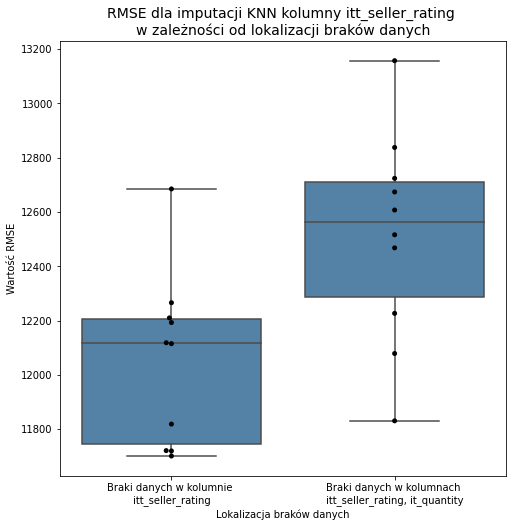

In [41]:
plt.figure(figsize=(8, 8))
sns.boxplot(data = [rmserrors, rmserrors_seller_rating], color = "steelblue")
sns.swarmplot(data = [rmserrors, rmserrors_seller_rating], color = "black")
plt.title("RMSE dla imputacji KNN kolumny itt_seller_rating \nw zależności od lokalizacji braków danych", size=14)
plt.xticks([0, 1], ["Braki danych w kolumnie \nitt_seller_rating", "Braki danych w kolumnach \nitt_seller_rating, it_quantity"])
plt.xlabel("Lokalizacja braków danych")
plt.ylabel("Wartość RMSE")
plt.show()

**Wnioski:**
- Prosta imputacja średnią okazała się być lepsza w przypadku, gdy brakowało wartości w jednej kolumnie.
- Średnia jakość imputacji KNN spada - wielkość miary RMSE jest większa, jeśli braków danych jest więcej (np. występują one również w drugiej kolumnie).
- Jednocześnie większe jest także odchylenie standardowe miary RMSE, a w niektórych sytuacjach błąd jest mniejszy niż w przypadku braków danych tylko w jednej kolumnie (zależy to również od wylosowonego zestawu).
- Imputacja KNN okazuje się lepsza* w przypadku, gdy bierzemy pod uwagę więcej danych (obserwacji i cech). Jednak skorzystanie z tego algorytmu wymaga także większych zasobów wydajnościowych.

\* W notebooku `imputation_full_df.ipynb` prezentuję wynik po uwzględneniu wszystkich obserwacji. Wówczas RMSE wynosi 10252.94. 